TASK A

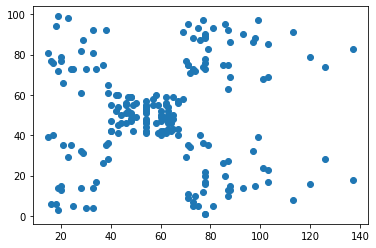

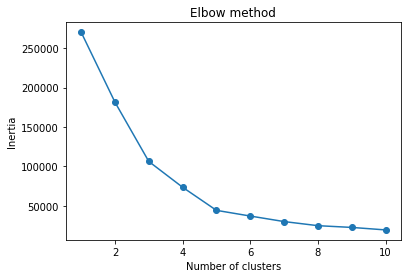

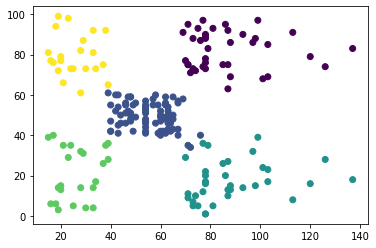

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
data=pd.read_csv("Mall_Customers.csv")
x=data.iloc[:,3]
y=data.iloc[:,4]
plt.scatter(x, y)
plt.show()

data = list(zip(x, y))
inertias = []

for i in range(1,11):
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(data)
  inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

kmeans = KMeans(n_clusters=5)
kmeans.fit(data)

plt.scatter(x, y, c=kmeans.labels_)
plt.show()

TASK B

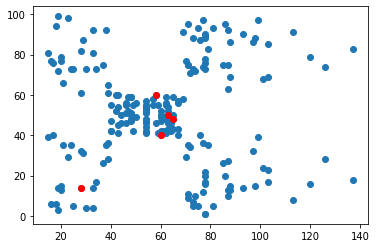

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import random as rd
data=pd.read_csv("Mall_Customers.csv")
data.head()
x=data.iloc[:,3]
y=data.iloc[:,4]
K=5
Centroids = (data.sample(n=K))
plt.scatter(x, y)
plt.scatter(Centroids["Annual Income (k$)"],Centroids["Spending Score (1-100)"],c='red')
plt.show()

In [27]:
diff = 1
j=0

while(diff!=0):
    df=data
    i=1
    for index1,row_c in Centroids.iterrows():
        ED=[]
        for index2,row_d in df.iterrows():
            d1=(row_c["Annual Income (k$)"]-row_d["Annual Income (k$)"])**2
            d2=(row_c["Spending Score (1-100)"]-row_d["Spending Score (1-100)"])**2
            d=np.sqrt(d1+d2)
            ED.append(d)
        data[i]=ED
        i=i+1

    C=[]
    for index,row in data.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos=i+1
        C.append(pos)
    data["Cluster"]=C
    Centroids_new = data.groupby(["Cluster"]).mean()[["Spending Score (1-100)","Annual Income (k$)"]]
    if j == 0:
        diff=1
        j=j+1
    else:
        diff = (Centroids_new['Spending Score (1-100)'] - Centroids['Spending Score (1-100)']).sum() + (Centroids_new['Annual Income (k$)'] - Centroids['Annual Income (k$)']).sum()
        print(diff.sum())
    Centroids = data.groupby(["Cluster"]).mean()[["Spending Score (1-100)","Annual Income (k$)"]]

21.73153977625492
17.564102575755484
7.8879466435351056
-4.616523192038063
-20.40725821960242
-12.077372989513933
0.0


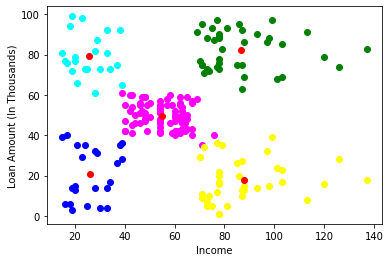

In [29]:
color=['blue','green','cyan','magenta','yellow']
for k in range(K):
    datay=data[data["Cluster"]==k+1]
    plt.scatter(datay["Annual Income (k$)"],datay["Spending Score (1-100)"],c=color[k])
plt.scatter(Centroids["Annual Income (k$)"],Centroids["Spending Score (1-100)"],c='red')
plt.xlabel('Income')
plt.ylabel('Loan Amount (In Thousands)')
plt.show()